In [1]:
from sklearn import preprocessing
from sklearn import metrics

In [ ]:
import numpy as np
import pandas as pd
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, RNN, LSTM, GRU, SpatialDropout1D, Dropout

In [ ]:
import matplotlib.pyplot as plt
import os, os.path, sys

Pravljenje Srednje vrednosti svih putanja. Napravljena je putanja ka direktorijumu koji sadrzi podatke za X-osu bez desinhronizacije, gde je potom iterirano kroz direktorijum i pokupljene su sve informacije iz adekvatnih txt fajlova

In [ ]:
path = r"podaci\0k\X"

In [ ]:
dir = os.listdir(path)

Napravljen je pandas DataFrame gde su atributi zasebno pokrenute putanje, dok ce ciljna promenljiva da bude srednja vrednost svih putanja

In [ ]:
file_names = []
for file in dir:
    file_names.append(file)

In [ ]:
main_df = pd.DataFrame()
for file in file_names:
    new_path = path + '\\' + file
    main_df[file] = pd.read_csv(new_path)

In [ ]:
#df = pd.read_csv(r"podaci\0k\X\x-0k_v1.txt")

In [ ]:
main_df = main_df[0:61000]

In [ ]:
main_df = main_df.astype('int')

In [ ]:
main_df.head()

In [49]:
train_data = main_df['x-0k_v1.txt']
test_data = main_df['x-0k_v10.txt']

In [50]:
train_data = train_data.array.reshape(-1,1)
test_data = test_data.array.reshape(-1,1)

In [51]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaler.fit(train_data)

MinMaxScaler()

Potencijalni time_stepovi su (1, 2, 4, 5, 8, 10, 20, 25, 40, 50, 61, 100), kako bi bili deljivi sa 61000

In [52]:
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [19]:
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y, Y_ind

In [53]:
time_steps = 20
trainX, trainY, Y_ind = get_XY(train_data, time_steps)
testX, testY, Y_ind = get_XY(test_data, time_steps)

In [54]:
units = 16
input_shape = (time_steps,1)
dense_units = 1

units = [2**x for x in range(8)]
batch_size = [2**x for x in range(7)]
#time_steps = [8,10,20,25,40,50,61,100]

best_units = None
best_batch = None
best_steps = None
best_skor = float('-inf')

for unit in units:
    for batch in batch_size:
        model = Sequential([
            SimpleRNN(units=unit, input_shape = input_shape, activation = keras.layers.LeakyReLU()),
            Dense(units = 1, activation=keras.layers.LeakyReLU(),bias_initializer='zeros', kernel_initializer='normal')
        ])
        model.compile(loss='mean_squared_error', optimizer = 'adam')
        
        model.fit(trainX, trainY, epochs = 10, batch_size = batch)
        x_predict = model.predict(trainX)
        
        num_correct = 0
        for i in range(len(x_predict)):
            if x_predict[i] > min_koord[Y_ind][i] and x_predict[i] < max_koord[Y_ind][i]:
                #print(scaler.inverse_transform(min_koord)[Y_ind][i], scaler.inverse_transform(x_predict)[i], scaler.inverse_transform(max_koord)[Y_ind][i])
                num_correct += 1
        print(num_correct, unit)        
        if num_correct > best_skor:
            best_skor = num_correct
            best_units = unit
            best_batch = batch

print("best skor: ", best_skor)
print("best unit: ", best_units)
print("best batch: ", best_batch)

najbolji units = 16; batch size =2

time_steps = [8,10,20,25,40,50,61,100]
best_step = None
best_skor = float('-inf')
for step in time_steps:
    trainX, trainY, Y_ind = get_XY(train_data, step)
    testX, testY, Y_ind = get_XY(test_data, step)
    input_shape = (step,1)
    model = Sequential()
    model.add(SimpleRNN(units = 16, input_shape = input_shape, activation = keras.layers.LeakyReLU()))
    #model.add(Dropout(0.05))
    model.add(Dense(units = 1, activation=keras.layers.LeakyReLU(), bias_initializer='zeros', kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer = 'adam')
    
    model.fit(trainX, trainY, epochs=10, batch_size = 2, verbose = 2)
    x_predict = model.predict(trainX)
        
    num_correct = 0
    for i in range(len(x_predict)):
        if x_predict[i] > min_koord[Y_ind][i] and x_predict[i] < max_koord[Y_ind][i]:
            #print(scaler.inverse_transform(min_koord)[Y_ind][i], scaler.inverse_transform(x_predict)[i], scaler.inverse_transform(max_koord)[Y_ind][i])
            num_correct += 1      
    if num_correct > best_skor:
        best_skor = num_correct
        best_step = step

print(best_skor, best_step)

best step = 20

In [67]:
model = Sequential()
model.add(SimpleRNN(units = 16, input_shape = input_shape, activation = keras.layers.LeakyReLU()))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 16, activation='relu'))
#model.add(Dropout(0.05))
model.add(Dense(units = 1, activation=keras.layers.LeakyReLU(), bias_initializer='zeros', kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [55]:
np.random.seed(61000)

In [68]:
history = model.fit(trainX, trainY, epochs=10, batch_size = 2, verbose = 2)

Epoch 1/10
1525/1525 - 6s - loss: 0.0045 - 6s/epoch - 4ms/step
Epoch 2/10
1525/1525 - 4s - loss: 2.6079e-04 - 4s/epoch - 2ms/step
Epoch 3/10
1525/1525 - 4s - loss: 3.0497e-04 - 4s/epoch - 3ms/step
Epoch 4/10
1525/1525 - 4s - loss: 4.6135e-05 - 4s/epoch - 3ms/step
Epoch 5/10
1525/1525 - 4s - loss: 1.1881e-04 - 4s/epoch - 3ms/step
Epoch 6/10
1525/1525 - 4s - loss: 1.5737e-04 - 4s/epoch - 3ms/step
Epoch 7/10
1525/1525 - 4s - loss: 6.9583e-05 - 4s/epoch - 3ms/step
Epoch 8/10
1525/1525 - 4s - loss: 1.5104e-04 - 4s/epoch - 3ms/step
Epoch 9/10
1525/1525 - 4s - loss: 6.6506e-05 - 4s/epoch - 3ms/step
Epoch 10/10
1525/1525 - 4s - loss: 1.2611e-04 - 4s/epoch - 3ms/step


In [69]:
def plot_graphs(history):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.plot(history.epoch, history.history['loss'], label='training')
    plt.legend(loc='best')
    plt.xlabel('Epochs')

    plt.show()

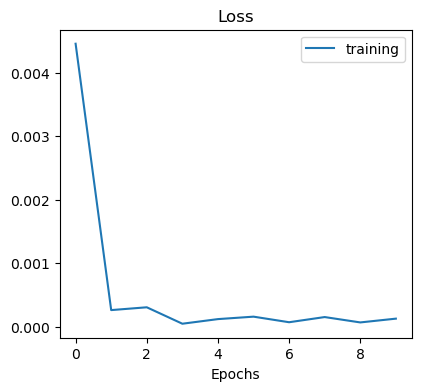

In [70]:
plot_graphs(history)

In [71]:
train_scores = model.evaluate(testX, testY)

96/96 [==============================] - 0s 2ms/step - loss: 5.7673e-06


In [72]:
x_predict = model.predict(trainX)
test_predict = model.predict(testX)

96/96 [==============================] - 0s 2ms/step


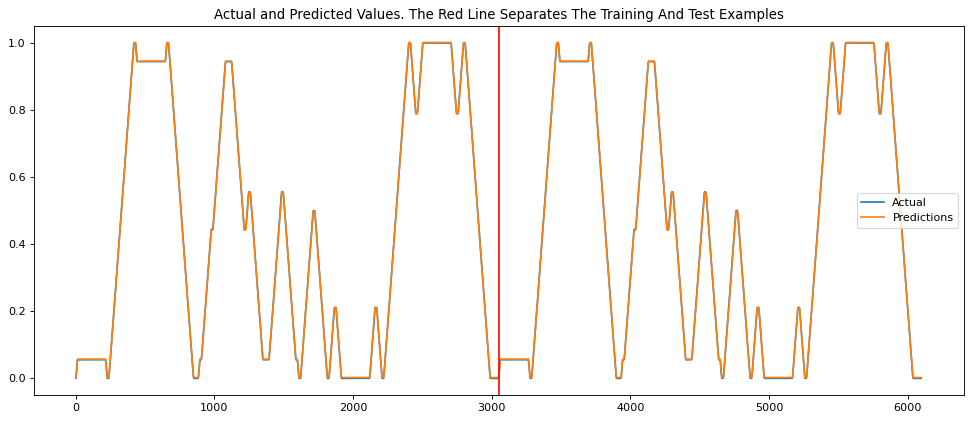

In [73]:
# Plot the result
def plot_result(trainY, testY, x_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(x_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, x_predict, test_predict)

In [74]:
max_koord = pd.read_csv(r"C:\Users\mata2\Desktop\jupyter\Master rad\Matija_Grulovic\podaci\0k\X_max_koord_0k.txt", names=['x osa'])
min_koord = pd.read_csv(r"C:\Users\mata2\Desktop\jupyter\Master rad\Matija_Grulovic\podaci\0k\X_min_koord_0k.txt", names=['x osa'])

In [75]:
max_koord = scaler.transform(max_koord)
min_koord = scaler.transform(min_koord)

D:\Users\mata2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
D:\Users\mata2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [68]:
#plt.figure(figsize=(15,5))
#plt.plot(min_koord[8300:8500])
#plt.plot(max_koord[8300:8500])

In [78]:
num_correct = 0
for i in range(len(x_predict)):
    if x_predict[i] > min_koord[Y_ind][i] and x_predict[i] < max_koord[Y_ind][i]:
        print(scaler.inverse_transform(min_koord)[Y_ind][i], scaler.inverse_transform(x_predict)[i], scaler.inverse_transform(max_koord)[Y_ind][i])
        num_correct += 1

[6237.] [6248.1504] [6250.]
[99741.] [99753.29] [99755.]
[98741.] [98742.45] [98753.]
[55743.] [55745.875] [55750.]
[99742.] [99748.46] [99754.]
[55744.] [55746.242] [55751.]
[1037.] [1038.12] [1051.]
[7750.] [7758.501] [7760.]
[55744.] [55745.71] [55751.]
[22741.] [22748.045] [22749.]
[1035.] [1038.2004] [1053.]
[7749.] [7757.9043] [7760.]
[22741.] [22748.117] [22749.]
[6241.] [6247.461] [6251.]
[142245.] [142253.53] [142281.]
[99742.] [99753.03] [99755.]
[98741.] [98742.02] [98752.]
[55744.] [55745.617] [55750.]
[22740.] [22747.637] [22749.]


In [77]:
(num_correct/(len(x_predict)))

0.006231551328304362

In [66]:
for i in range(len(x_predict)):
    print(scaler.inverse_transform(min_koord)[Y_ind][i], scaler.inverse_transform(x_predict)[i], scaler.inverse_transform(max_koord)[Y_ind][i])

[115.] [275.22812] [135.]
[472.] [581.3748] [492.]
[1044.] [1063.1655] [1056.]
[1788.] [1784.2911] [1798.]
[2740.] [2736.7476] [2758.]
[3746.] [3847.7292] [3759.]
[4748.] [4889.947] [4760.]
[5747.] [5931.999] [5761.]
[6750.] [7065.3877] [6759.]
[7750.] [8364.543] [7758.]
[8608.] [9246.05] [8616.]
[9251.] [9768.177] [9260.]
[9691.] [10134.709] [9716.]
[9933.] [10339.292] [9967.]
[10001.] [10384.443] [10025.]
[9999.] [10385.134] [10012.]
[9992.] [10385.371] [10008.]
[9993.] [10385.457] [10003.]
[9993.] [10385.457] [10003.]
[9994.] [10385.457] [10003.]
[9994.] [10385.457] [10003.]
[9994.] [10385.457] [10003.]
[9994.] [10385.457] [10003.]
[9994.] [10385.359] [10003.]
[9994.] [10385.436] [10003.]
[9993.] [10385.419] [10003.]
[9994.] [10385.419] [10003.]
[9993.] [10385.457] [10003.]
[9995.] [10385.457] [10003.]
[9995.] [10385.457] [10003.]
[9995.] [10385.457] [10003.]
[9995.] [10385.457] [10003.]
[9995.] [10385.457] [10003.]
[9995.] [10385.457] [10003.]
[9995.] [10385.457] [10003.]
[9995.] [

[55247.] [54930.21] [55257.]
[56247.] [55918.324] [56258.]
[57248.] [56911.008] [57257.]
[58245.] [57898.57] [58257.]
[59245.] [58887.76] [59254.]
[60244.] [59877.48] [60253.]
[61244.] [60867.863] [61253.]
[62245.] [61858.082] [62253.]
[63243.] [62847.848] [63253.]
[64247.] [63839.664] [64259.]
[65247.] [64831.973] [65255.]
[66246.] [65822.71] [66253.]
[67245.] [66821.92] [67252.]
[68244.] [67820.734] [68253.]
[69244.] [68820.39] [69258.]
[70243.] [69822.39] [70255.]
[71244.] [70829.71] [71256.]
[72244.] [71838.47] [72257.]
[73244.] [72843.555] [73257.]
[74246.] [73841.17] [74258.]
[75247.] [74837.266] [75258.]
[76246.] [75830.664] [76258.]
[77245.] [76824.34] [77255.]
[78243.] [77815.73] [78256.]
[79244.] [78809.95] [79255.]
[80243.] [79802.76] [80254.]
[81244.] [80797.93] [81254.]
[82243.] [81790.695] [82253.]
[83245.] [82784.7] [83255.]
[84247.] [83779.64] [84255.]
[85248.] [84775.72] [85259.]
[86246.] [85768.36] [86257.]
[87248.] [86761.61] [87256.]
[88246.] [87753.11] [88254.]
[89

[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.28] [170002.]
[169994.] [169067.28] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.] [169067.31] [170002.]
[169994.

[3243.] [3319.113] [3261.]
[4245.] [4368.008] [4257.]
[5246.] [5409.846] [5258.]
[6247.] [6452.8354] [6258.]
[7250.] [7713.6147] [7259.]
[8208.] [8919.717] [8215.]
[8948.] [9525.646] [8962.]
[9510.] [9975.928] [9522.]
[9825.] [10241.361] [9854.]
[10005.] [10400.145] [10033.]
[10004.] [10397.842] [10030.]
[9990.] [10381.608] [10006.]
[9992.] [10382.314] [10005.]
[9993.] [10382.277] [10004.]
[9996.] [10382.277] [10004.]
[9996.] [10382.277] [10004.]
[9996.] [10382.277] [10004.]
[9996.] [10382.277] [10004.]
[10104.] [10466.738] [10145.]
[10469.] [10748.059] [10500.]
[11041.] [11179.547] [11059.]
[11788.] [11587.867] [11813.]
[12739.] [12442.649] [12756.]
[13745.] [13813.175] [13759.]
[14745.] [14900.749] [14757.]
[15745.] [15889.763] [15757.]
[16746.] [16881.088] [16758.]
[17746.] [17871.482] [17759.]
[18745.] [18859.629] [18758.]
[19746.] [19849.354] [19758.]
[20745.] [20839.252] [20758.]
[21742.] [21826.223] [21756.]
[22747.] [22816.305] [22755.]
[23746.] [23805.852] [23755.]
[24746.] [2

[131742.] [131161.05] [131751.]
[130742.] [130168.11] [130750.]
[129741.] [129175.17] [129751.]
[128742.] [128181.24] [128750.]
[127742.] [127187.766] [127750.]
[126742.] [126193.49] [126750.]
[125740.] [125199.44] [125750.]
[124742.] [124205.31] [124749.]
[123744.] [123213.96] [123751.]
[122744.] [122221.39] [122751.]
[121746.] [121229.91] [121753.]
[120742.] [120238.234] [120754.]
[119741.] [119233.42] [119756.]
[118740.] [118241.53] [118755.]
[117738.] [117247.69] [117754.]
[116743.] [116254.516] [116753.]
[115742.] [115261.25] [115753.]
[114741.] [114266.71] [114753.]
[113744.] [113274.766] [113755.]
[112741.] [112280.8] [112754.]
[111742.] [111286.47] [111753.]
[110741.] [110292.875] [110752.]
[109741.] [109299.4] [109752.]
[108742.] [108306.55] [108752.]
[107741.] [107311.805] [107752.]
[106741.] [106317.414] [106751.]
[105742.] [105324.35] [105752.]
[104742.] [104333.26] [104753.]
[103743.] [103339.93] [103753.]
[102744.] [102347.52] [102754.]
[101744.] [101354.1] [101755.]
[100

[58245.] [57899.586] [58254.]
[59245.] [58887.81] [59253.]
[60245.] [59877.133] [60252.]
[61244.] [60867.496] [61259.]
[62244.] [61858.258] [62257.]
[63243.] [62847.84] [63255.]
[64246.] [63840.418] [64259.]
[65248.] [64831.652] [65255.]
[66246.] [65822.41] [66257.]
[67247.] [66821.414] [67256.]
[68246.] [67821.28] [68254.]
[69245.] [68821.164] [69253.]
[70244.] [69822.7] [70252.]
[71245.] [70829.73] [71252.]
[72245.] [71839.] [72253.]
[73245.] [72842.77] [73253.]
[74247.] [73841.51] [74255.]
[75248.] [74837.64] [75257.]
[76247.] [75831.57] [76256.]
[77246.] [76824.8] [77253.]
[78243.] [77815.18] [78251.]
[79245.] [78809.484] [79255.]
[80243.] [79802.17] [80252.]
[81244.] [80806.266] [81257.]
[82244.] [81800.53] [82255.]
[83244.] [82795.5] [83256.]
[84246.] [83790.67] [84257.]
[85248.] [84785.64] [85260.]
[86248.] [85772.36] [86259.]
[87248.] [86766.16] [87258.]
[88247.] [87758.95] [88255.]
[89248.] [88754.414] [89259.]
[90247.] [89747.5] [90257.]
[91246.] [90740.48] [91257.]
[92246.] 

[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.62955] [0.]
[-5.] [175.

[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.] [179001.97] [180004.]
[179995.

[107739.] [107316.63] [107752.]
[106742.] [106322.125] [106751.]
[105741.] [105330.3] [105751.]
[104740.] [104338.17] [104754.]
[103743.] [103344.664] [103753.]
[102743.] [102351.91] [102754.]
[101745.] [101358.52] [101754.]
[100744.] [100364.44] [100755.]
[99742.] [99371.06] [99755.]
[98741.] [98377.24] [98752.]
[97741.] [97380.86] [97750.]
[96738.] [96385.41] [96748.]
[95739.] [95392.25] [95752.]
[94742.] [94400.805] [94750.]
[93740.] [93406.01] [93751.]
[92740.] [92413.8] [92750.]
[91742.] [91420.75] [91752.]
[90743.] [90428.4] [90751.]
[89743.] [89434.47] [89752.]
[88742.] [88440.24] [88751.]
[87741.] [87444.95] [87751.]
[86741.] [86451.016] [86750.]
[85744.] [85457.41] [85750.]
[84746.] [84465.75] [84751.]
[83746.] [83473.945] [83753.]
[82743.] [82476.71] [82749.]
[81745.] [81483.81] [81750.]
[80744.] [80490.93] [80751.]
[79744.] [79496.86] [79751.]
[78745.] [78503.945] [78750.]
[77743.] [77508.375] [77749.]
[76741.] [76513.77] [76747.]
[75741.] [75519.12] [75747.]
[74742.] [74525